## Simple Linear Regression


Implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.You would like to use this data to help you select which city to expand to next.

*Note:
The file ex1data1.txt contains the dataset for our linear regression prob-
lem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.*

Hypothesis function used:  h<sub>&#952;</sub>(x) = &#952;<sub>0</sub> + &#952;<sub>1</sub>X<sub>1</sub>

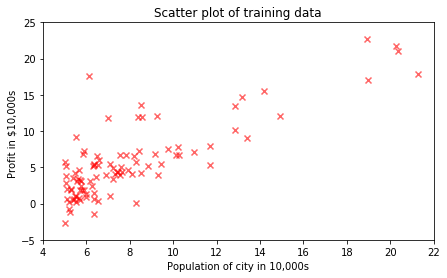

In [11]:
import numpy as np
import matplotlib.pyplot as mat
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

data = []
x = [] # Matrix to store the population of the city
y = [] # Matrix to store the profits

for i,lines in enumerate(open('./Files/ex1data1.txt','r')):
    data.append(lines.split(','))
    x.append(data[i][0])
    y.append(data[i][1])
    
#Coverting the python lists to NumPY array
    
x = np.array(x,dtype = 'd')
y = np.array(y,dtype = 'd')

#Reshaping x and y to 97x1 coulmn Vector

x = x.reshape(97,1)
y = y.reshape(97,1)

#scatter plot to visualize the data

mat.figure(figsize=(7,4))    
mat.scatter(x,y,c='red',marker='x',alpha=0.6)
mat.xlim(4,22)
mat.xlabel('Population of city in 10,000s')
mat.ylabel('Profit in $10,000s ')
mat.ylim(-5,25)
mat.title('Scatter plot of training data')
mat.show()

In [12]:
def CostFn(X,y,Theta=[[],[]]):
    h = np.dot(X,Theta)
    m = y.size
    J = (1/(2*m))*np.sum(np.square(h-y))
    return J

The new adjusted regression coefficient matrix:
 [[-3.63029144]
 [ 1.16636235]]


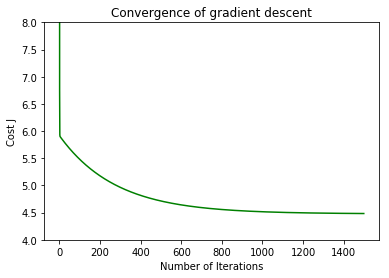

In [13]:
#Convert X to a 97x2 matrix and initialize the new column with 1 as the value
#This step is done to make the calculations easy

unitM = np.ones((97,1))
X1 = np.hstack((unitM,x)) #This our new feature matrix

theta = np.zeros((2,1)) #Regression coefficient matrix initialized to a null matrix

L=0.01 #Learning rate

m = len(y) #No of training samples

iterations = 1500

J_History = []

#Applying gradient descent

for i in range(iterations):
    h = np.dot(X1,theta)
    J_History.append(CostFn(X1,y,theta))
    t1 = ((h-y).T).dot(unitM)
    t2 = ((h-y).T).dot(x)
    temp1 = theta[0][0]-((L/m)*t1.sum())
    temp2 = theta[1][0]-((L/m)*t2.sum())
   
    #Simultaneously update coefficient matrix
    theta[0][0]=temp1
    theta[1][0]=temp2

print("The new adjusted regression coefficient matrix:\n",theta)

mat.title("Convergence of gradient descent")
mat.xlabel("Number of Iterations")
mat.ylabel("Cost J")
mat.ylim(4,8)
mat.plot(J_History,c='green')
mat.show()

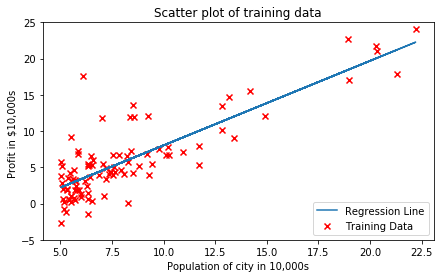

In [14]:
#Plotting the Regression Line over the scatter plot

mat.figure(figsize=(7,4))    
mat.scatter(x,y,c='red',marker='x',label='Training Data')
mat.plot(x,h,label='Regression Line')
mat.legend(loc='lower right')
mat.xlabel('Population of city in 10,000s')
mat.ylabel('Profit in $10,000s ')
mat.ylim(-5,25)
mat.title('Scatter plot of training data')
mat.show()

In [15]:
# Predict the profits in areas of 35,000 and 70,000 people.
print("Expected profit for  population = 35k is: 4520$")
print("Expected profit for  population = 70k is: 45342$\n")

predict1 = np.array([1,3.5]).dot(theta) 
predict2 = np.array([1,7]).dot(theta)

print("Computed profit for  p4opulation = 35k is: ",predict1[0]*10000,"\b$")
print("Computed profit for  population = 70k is: ",predict2[0]*10000,"\b$")

Expected profit for  population = 35k is: 4520$
Expected profit for  population = 70k is: 45342$

Computed profit for  p4opulation = 35k is:  4519.767867701776 $
Computed profit for  population = 70k is:  45342.45012944714 $


#### Visualizing J(θ)

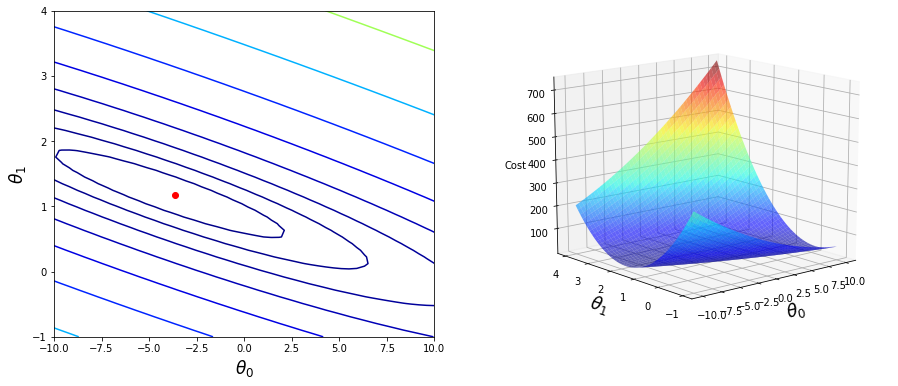

In [17]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))
T = np.zeros((2,1))
# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    T[0][0]=xx[i,j]
    T[1][0]=yy[i,j]
    Z[i,j] = CostFn(X1,y,T)

fig = mat.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=mat.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=mat.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)